In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
url = 'https://raw.githubusercontent.com/aswintechguy/Machine-Learning-Projects/refs/heads/master/Mall%20Customer%20Segmenation%20Analysis%20-%20Clustering/Mall_Customers.csv'
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.shape

(200, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# EDA

<Axes: xlabel='count', ylabel='Gender'>

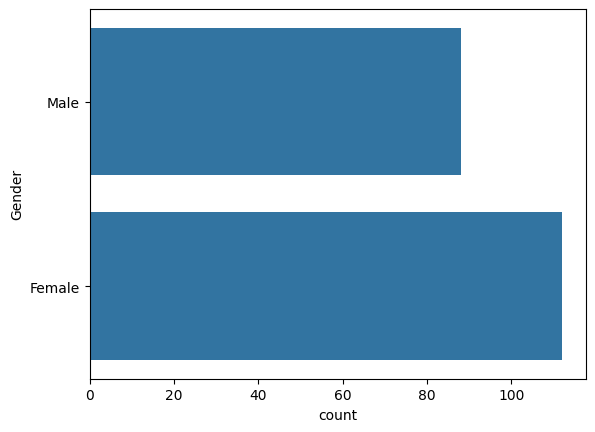

In [9]:
sns.countplot(df['Gender'])

<Axes: xlabel='Age', ylabel='Density'>

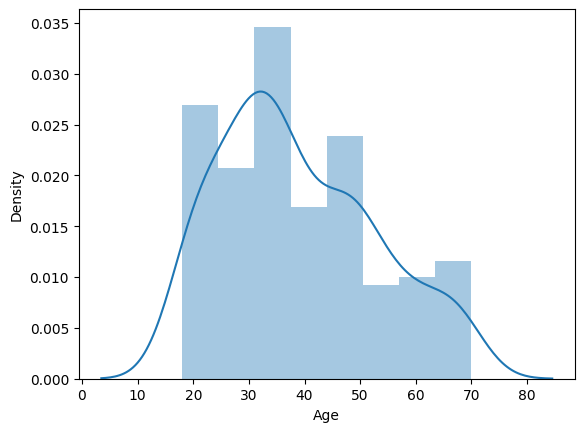

In [11]:
sns.distplot(df['Age'])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

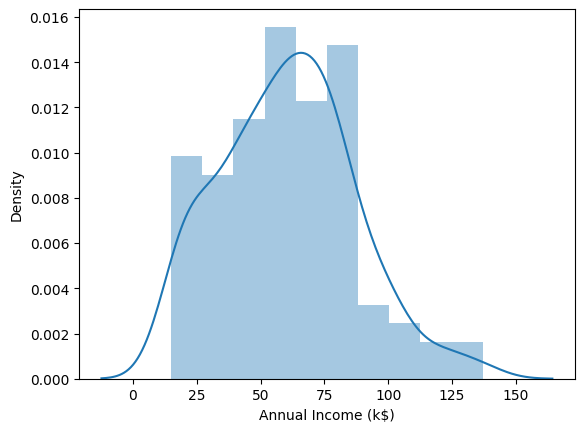

In [12]:
sns.distplot(df['Annual Income (k$)'])

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

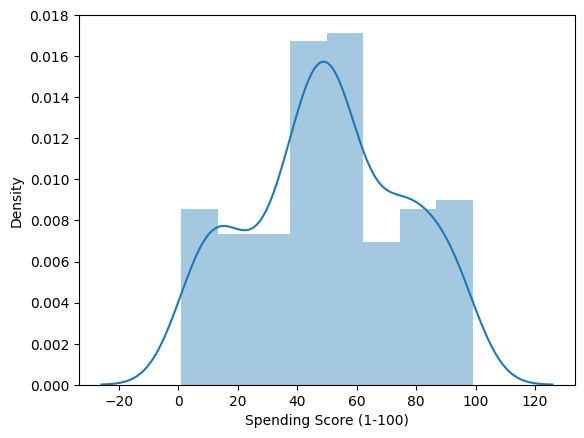

In [13]:
sns.distplot(df['Spending Score (1-100)'])

# Correlation Matrix

<Axes: >

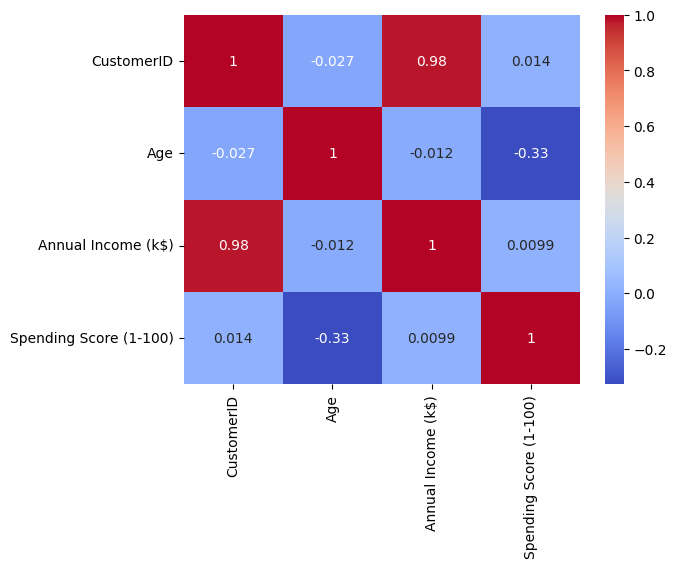

In [14]:
df1 = df.drop(columns=['Gender'])
corr = df1.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Clustering

In [15]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
df1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: ylabel='Annual Income (k$)'>

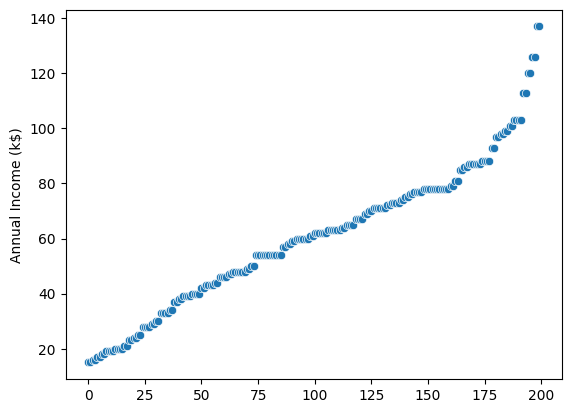

In [20]:
sns.scatterplot(df1['Annual Income (k$)'])

In [21]:
from sklearn.cluster import KMeans
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)

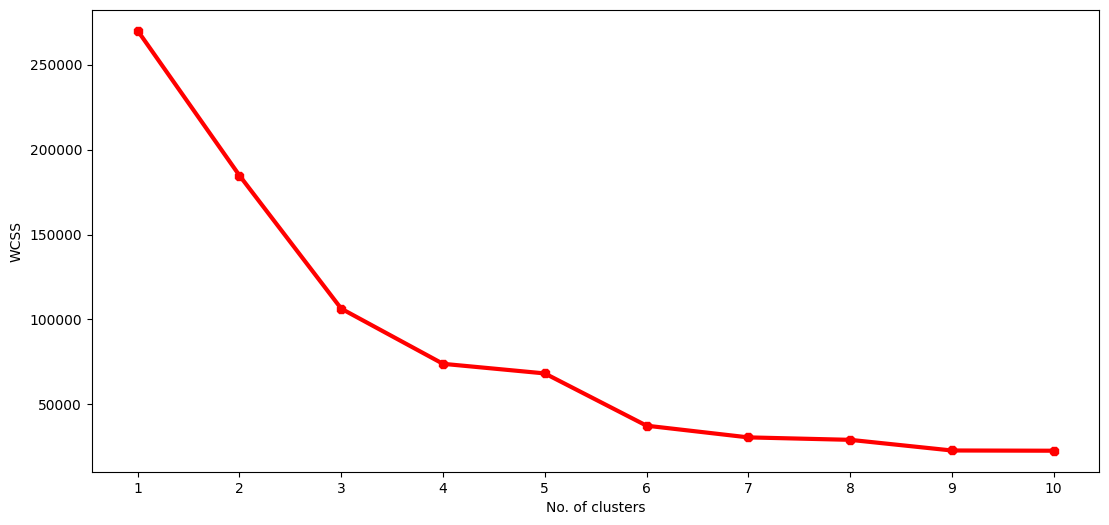

In [22]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [23]:
km = KMeans(n_clusters=5)
km.fit(df1)
y = km.predict(df1)
df1['Label'] = y
df1.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

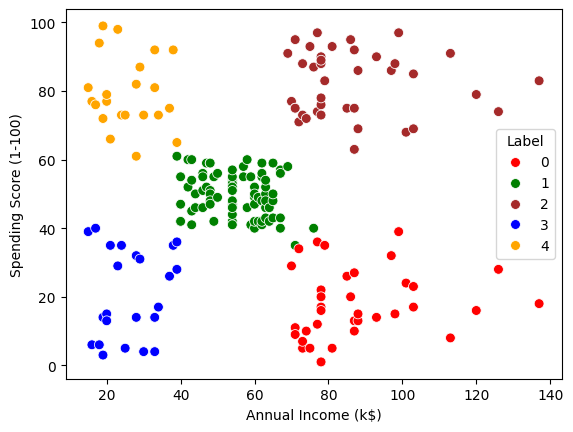

In [24]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1, hue='Label', s=50, palette=['red', 'green', 'brown', 'blue', 'orange'])

In [25]:
# cluster on 3 features
df2 = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]
df2.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [26]:
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2)
    errors.append(kmeans.inertia_)

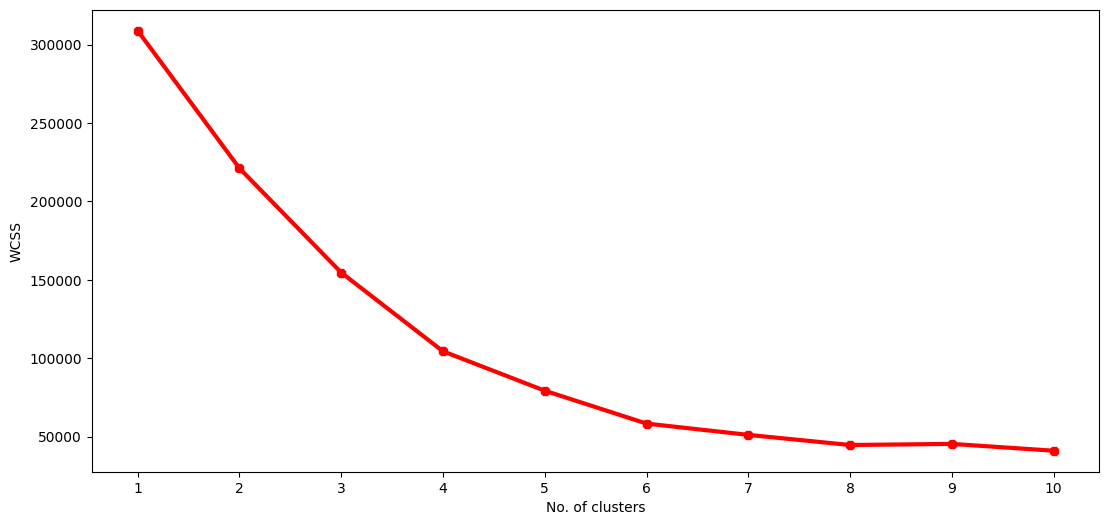

In [27]:
# plot the results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()